In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
url_pass_types = 'https://fbref.com/en/comps/Big5/passing_types/players/Big-5-European-Leagues-Stats'

In [4]:
data_passing = pd.read_html(url_passing, header=1)[0]
data_passing = data_passing[data_passing['Player'] != 'Player']
data_passing

Rk             Player   Nation    Pos          Squad  \
0        1         Max Aarons  eng ENG     DF   Norwich City   
1        2   Yunis Abdelhamid   ma MAR     DF          Reims   
2        3  Salis Abdul Samed   gh GHA     MF  Clermont Foot   
3        4    Laurent Abergel   fr FRA     MF        Lorient   
4        5        Charles Abi   fr FRA     FW  Saint-Étienne   
...    ...                ...      ...    ...            ...   
3000  2886   Martín Zubimendi   es ESP     MF  Real Sociedad   
3001  2887   Szymon Żurkowski   pl POL     MF         Empoli   
3002  2888    Martin Ødegaard   no NOR     MF        Arsenal   
3003  2889        Milan Đurić   ba BIH     FW    Salernitana   
3004  2890      Filip Đuričić   rs SRB  MF,FW       Sassuolo   

                    Comp     Age  Born   90s   Cmp  ... Cmp%.3 Ast   xA  A-xA  \
0     eng Premier League  22-132  2000  31.0  1043  ...   44.4   2  1.4  +0.6   
1             fr Ligue 1  34-230  1987  32.1  1239  ...   61.1   0  0.3  -0.3   
2             fr Ligue 1  22-051  2000  27.4  1532  ...   86.0   0  1.1  -1.1   
3             fr Ligue 1  29-104  1993  31.9  1282  ...   66.6   2  2.8  -0.8   
4             fr Ligue 1  22-034  2000   0.5     2  ...    NaN   0  0.0   0.0   
...                  ...     ...   ...   ...   ...  ...    ...  ..  ...   ...   
3000          es La Liga  23-103  1999  27.8  1174  ...   69.9   1  1.0   0.0   
3001          it Serie A  24-233  1997  24.6   704  ...   61.4   2  1.5  +0.5   
3002  eng Premier League  23-150  1998  28.9  1253  ...   68.1   4  6.3  -2.3   
3003          it Serie A  31-359  1990  23.1   408  ...   64.3   4  2.8  +1.2   
3004          it Serie A  30-106  1992   7.5   184  ...   85.7   1  1.3  -0.3   

      KP  1/3 PPA CrsPA Prog  Matches  
0     19   48  36     8   92  Matches  
1      7   77   6     0   87  Matches  
2     15   77  13     1   81  Matches  
3     28  121  17     6  126  Matches  
4      0    0   0     0    0  Matches  
...   ..  ...  ..   ...  ...      ...  
3000  15  113  10     1   97  Matches  
3001  19   51  19     3   65  Matches  
3002  68   91  61     3  140  Matches  
3003  29   18   4     0   30  Matches  
3004  11   13  18     0   34  Matches  

[2890 rows x 32 columns]

In [5]:
data_pass_types = pd.read_html(url_pass_types, header=1)[0]
data_pass_types = data_pass_types[data_pass_types['Player'] != 'Player']
data_pass_types

Rk             Player   Nation    Pos          Squad  \
0        1         Max Aarons  eng ENG     DF   Norwich City   
1        2   Yunis Abdelhamid   ma MAR     DF          Reims   
2        3  Salis Abdul Samed   gh GHA     MF  Clermont Foot   
3        4    Laurent Abergel   fr FRA     MF        Lorient   
4        5        Charles Abi   fr FRA     FW  Saint-Étienne   
...    ...                ...      ...    ...            ...   
3000  2886   Martín Zubimendi   es ESP     MF  Real Sociedad   
3001  2887   Szymon Żurkowski   pl POL     MF         Empoli   
3002  2888    Martin Ødegaard   no NOR     MF        Arsenal   
3003  2889        Milan Đurić   ba BIH     FW    Salernitana   
3004  2890      Filip Đuričić   rs SRB  MF,FW       Sassuolo   

                    Comp     Age  Born   90s   Att  ... Right Head   TI Other  \
0     eng Premier League  22-132  2000  31.0  1387  ...   886   28  307     2   
1             fr Ligue 1  34-230  1987  32.1  1506  ...   387   47   14     4   
2             fr Ligue 1  22-051  2000  27.4  1671  ...  1454   52    4     8   
3             fr Ligue 1  29-104  1993  31.9  1571  ...  1381   24    5     5   
4             fr Ligue 1  22-034  2000   0.5     6  ...     0    0    0     0   
...                  ...     ...   ...   ...   ...  ...   ...  ...  ...   ...   
3000          es La Liga  23-103  1999  27.8  1378  ...   968   52    0     8   
3001          it Serie A  24-233  1997  24.6   878  ...   695   17    5     3   
3002  eng Premier League  23-150  1998  28.9  1481  ...   123   32    9    12   
3003          it Serie A  31-359  1990  23.1   655  ...   200  118    2    50   
3004          it Serie A  30-106  1992   7.5   226  ...   198    5    4     0   

       Cmp Off Out.1 Int Blocks  Matches  
0     1043   7    27  52     54  Matches  
1     1239   5    32  38     28  Matches  
2     1532   2    16  34     23  Matches  
3     1282   7    17  57     54  Matches  
4        2   0     0   2      0  Matches  
...    ...  ..   ...  ..    ...      ...  
3000  1174   5    23  37     23  Matches  
3001   704   2    16  33     29  Matches  
3002  1253   7    15  51     31  Matches  
3003   408   2    10  30      9  Matches  
3004   184   0     1  10     14  Matches  

[2890 rows x 35 columns]

In [6]:
data_passing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2890 entries, 0 to 3004
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rk       2890 non-null   object
 1   Player   2890 non-null   object
 2   Nation   2889 non-null   object
 3   Pos      2890 non-null   object
 4   Squad    2890 non-null   object
 5   Comp     2890 non-null   object
 6   Age      2889 non-null   object
 7   Born     2889 non-null   object
 8   90s      2890 non-null   object
 9   Cmp      2890 non-null   object
 10  Att      2890 non-null   object
 11  Cmp%     2873 non-null   object
 12  TotDist  2890 non-null   object
 13  PrgDist  2890 non-null   object
 14  Cmp.1    2890 non-null   object
 15  Att.1    2890 non-null   object
 16  Cmp%.1   2844 non-null   object
 17  Cmp.2    2890 non-null   object
 18  Att.2    2890 non-null   object
 19  Cmp%.2   2824 non-null   object
 20  Cmp.3    2890 non-null   object
 21  Att.3    2890 non-null   object
 22  

In [7]:
d = data_passing[['Player', '90s', 'Cmp', 'PrgDist', 'Ast', 'xA', 'A-xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog']]

In [8]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

In [9]:
player_data = pd.merge(player_position, d, on="Player")
player_data.drop_duplicates(inplace=True)
player_data.iloc[:, 3:] = player_data.iloc[:, 3:].astype(float)

In [10]:
player_data

S. No.            Player            Position   90s     Cmp  PrgDist  \
0          4  Yunis Abdelhamid         Centre-Back  32.1  1239.0   9065.0   
1          7   Laurent Abergel  Defensive Midfield  31.9  1282.0   6459.0   
2          8       Charles Abi      Centre-Forward   0.5     2.0      0.0   
3          9    Matthis Abline      Centre-Forward   1.1     8.0     22.0   
4         12     Tammy Abraham      Centre-Forward  33.3   488.0   1726.0   
...      ...               ...                 ...   ...     ...      ...   
2007    2817        Kurt Zouma         Centre-Back  22.1   798.0   4597.0   
2008    2818     Igor Zubeldia  Defensive Midfield  18.3   920.0   5705.0   
2009    2820  Martín Zubimendi  Defensive Midfield  27.8  1174.0   5724.0   
2010    2822   Martin Ødegaard  Attacking Midfield  28.9  1253.0   4971.0   
2011    2823     Filip Đuričić  Attacking Midfield   7.5   184.0    770.0   

      Ast   xA  A-xA    KP    1/3   PPA  CrsPA   Prog  
0     0.0  0.3  -0.3   7.0   77.0   6.0    0.0   87.0  
1     2.0  2.8  -0.8  28.0  121.0  17.0    6.0  126.0  
2     0.0  0.0   0.0   0.0    0.0   0.0    0.0    0.0  
3     0.0  0.0   0.0   1.0    1.0   1.0    0.0    1.0  
4     4.0  3.5   0.5  34.0   37.0  28.0    4.0   60.0  
...   ...  ...   ...   ...    ...   ...    ...    ...  
2007  0.0  0.0   0.0   0.0   22.0   1.0    0.0   31.0  
2008  1.0  0.2   0.8   1.0   49.0   4.0    2.0   42.0  
2009  1.0  1.0   0.0  15.0  113.0  10.0    1.0   97.0  
2010  4.0  6.3  -2.3  68.0   91.0  61.0    3.0  140.0  
2011  1.0  1.3  -0.3  11.0   13.0  18.0    0.0   34.0  

[2012 rows x 14 columns]

c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

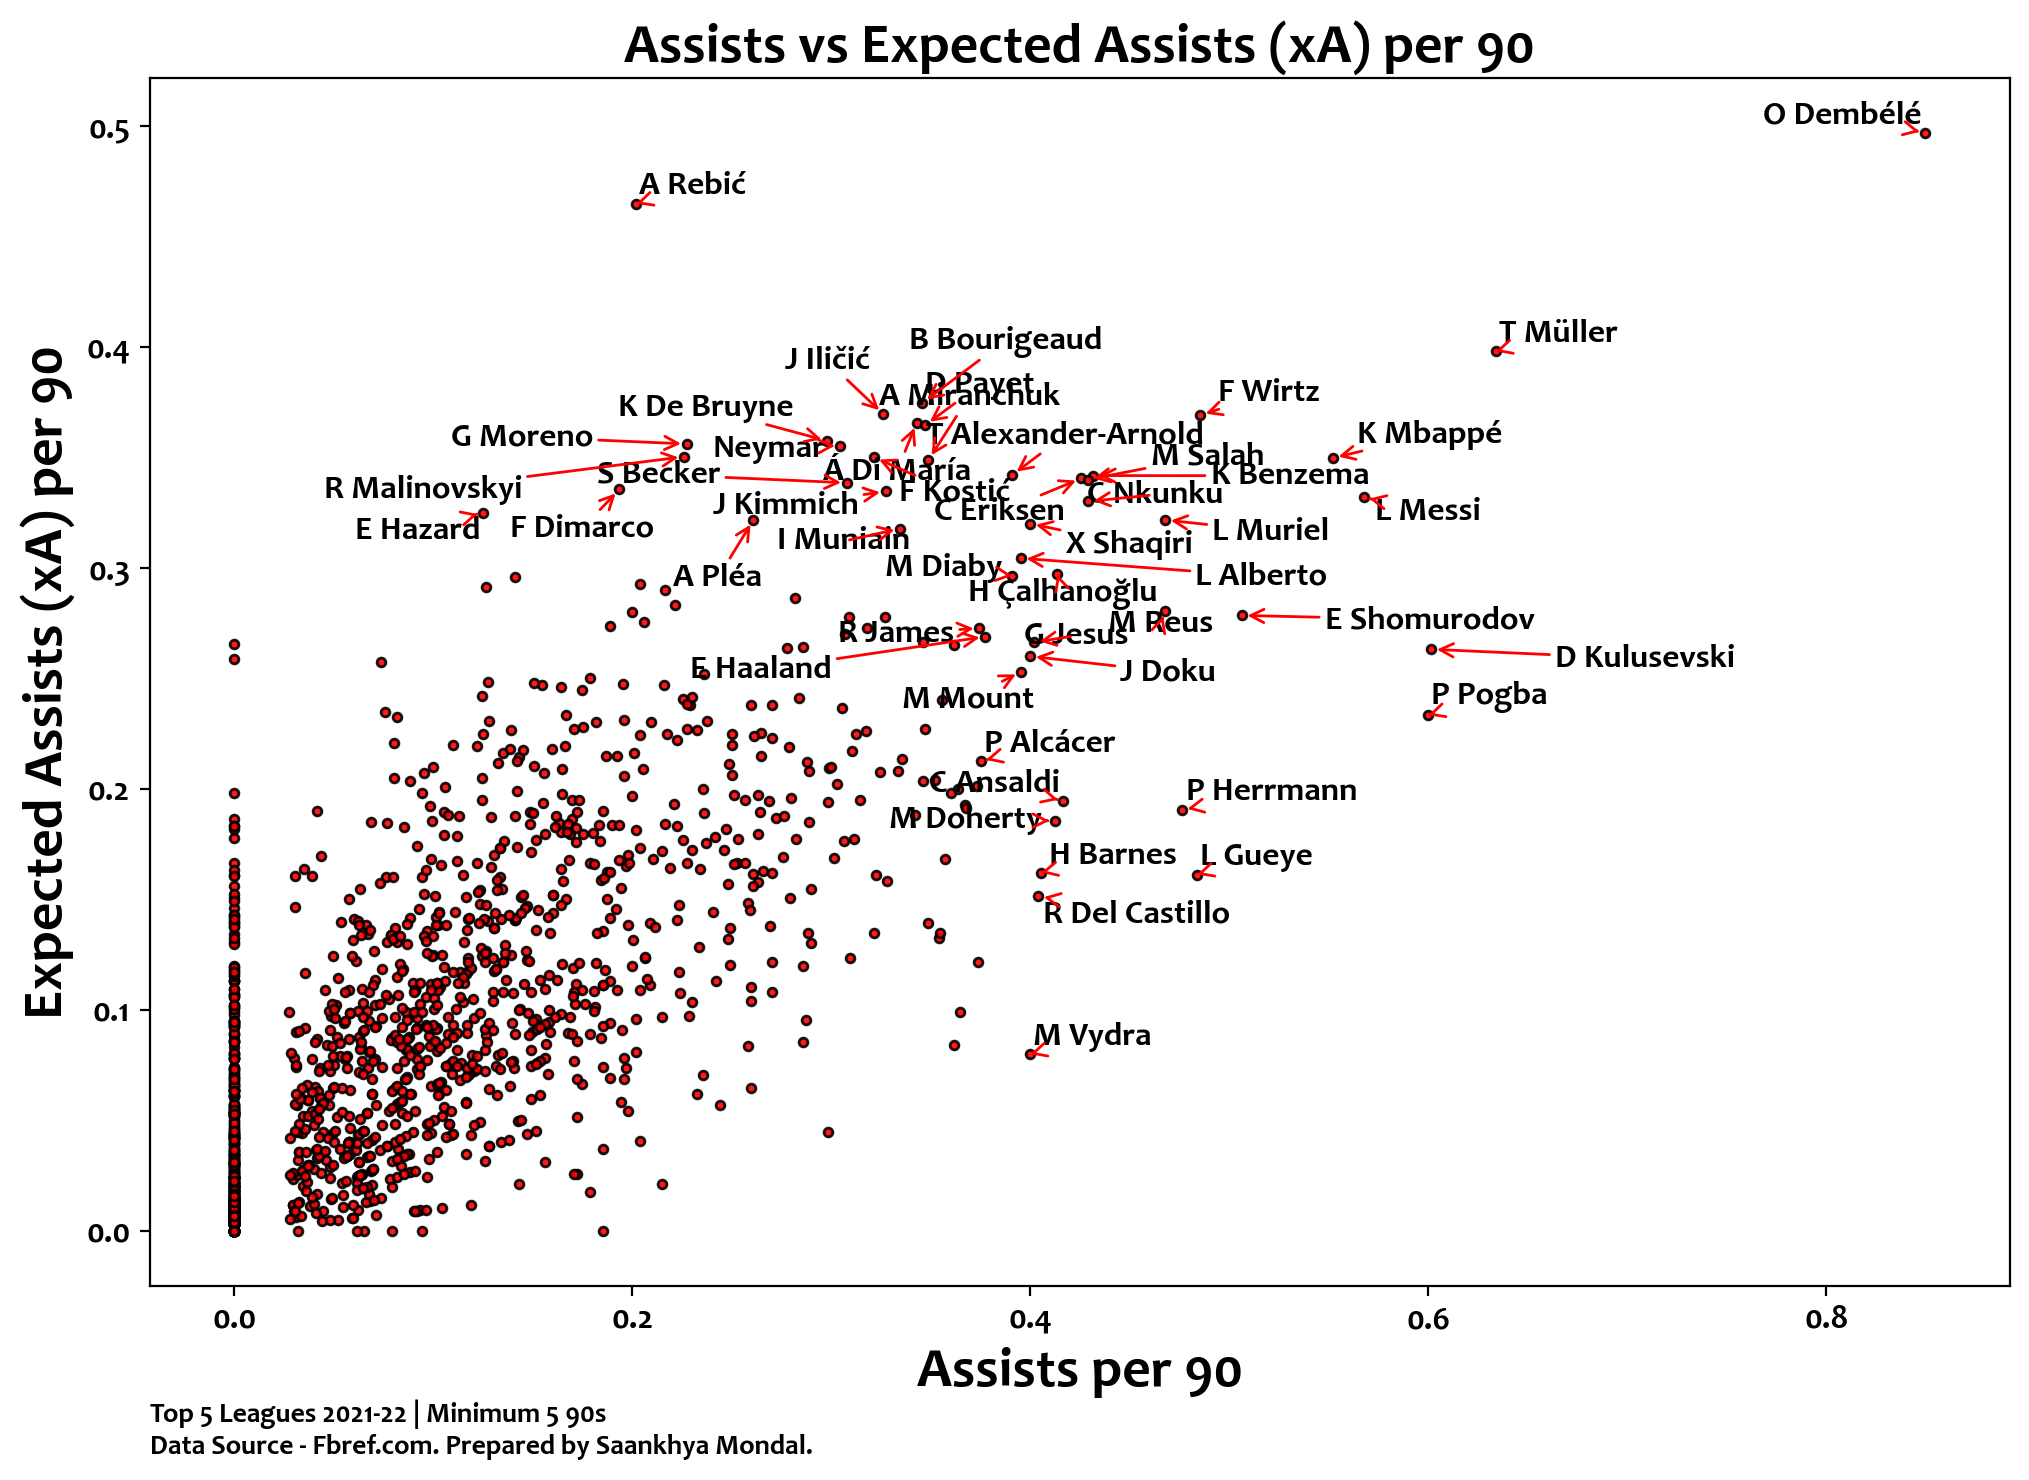

In [11]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data['Astp90'] = data['Ast']/data['90s']
data['xAp90'] = data['xA']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['xAp90'].quantile(0.980)
outlier_bottom = data['xAp90'].quantile(0.03)
outlier_right = data['Astp90'].quantile(0.980)
outlier_left = data['Astp90'].quantile(0.03)

par_x = list(data['Astp90'].astype(float))
par_y = list(data['xAp90'].astype(float))
plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Assists per 90', fontsize=20)
ax.set_ylabel('Expected Assists (xA) per 90', fontsize=20)
ax.set_title('Assists vs Expected Assists (xA) per 90', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [12]:
fig.savefig('Images/AvsxAp90.png', dpi=400, bbox_inches='tight')

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

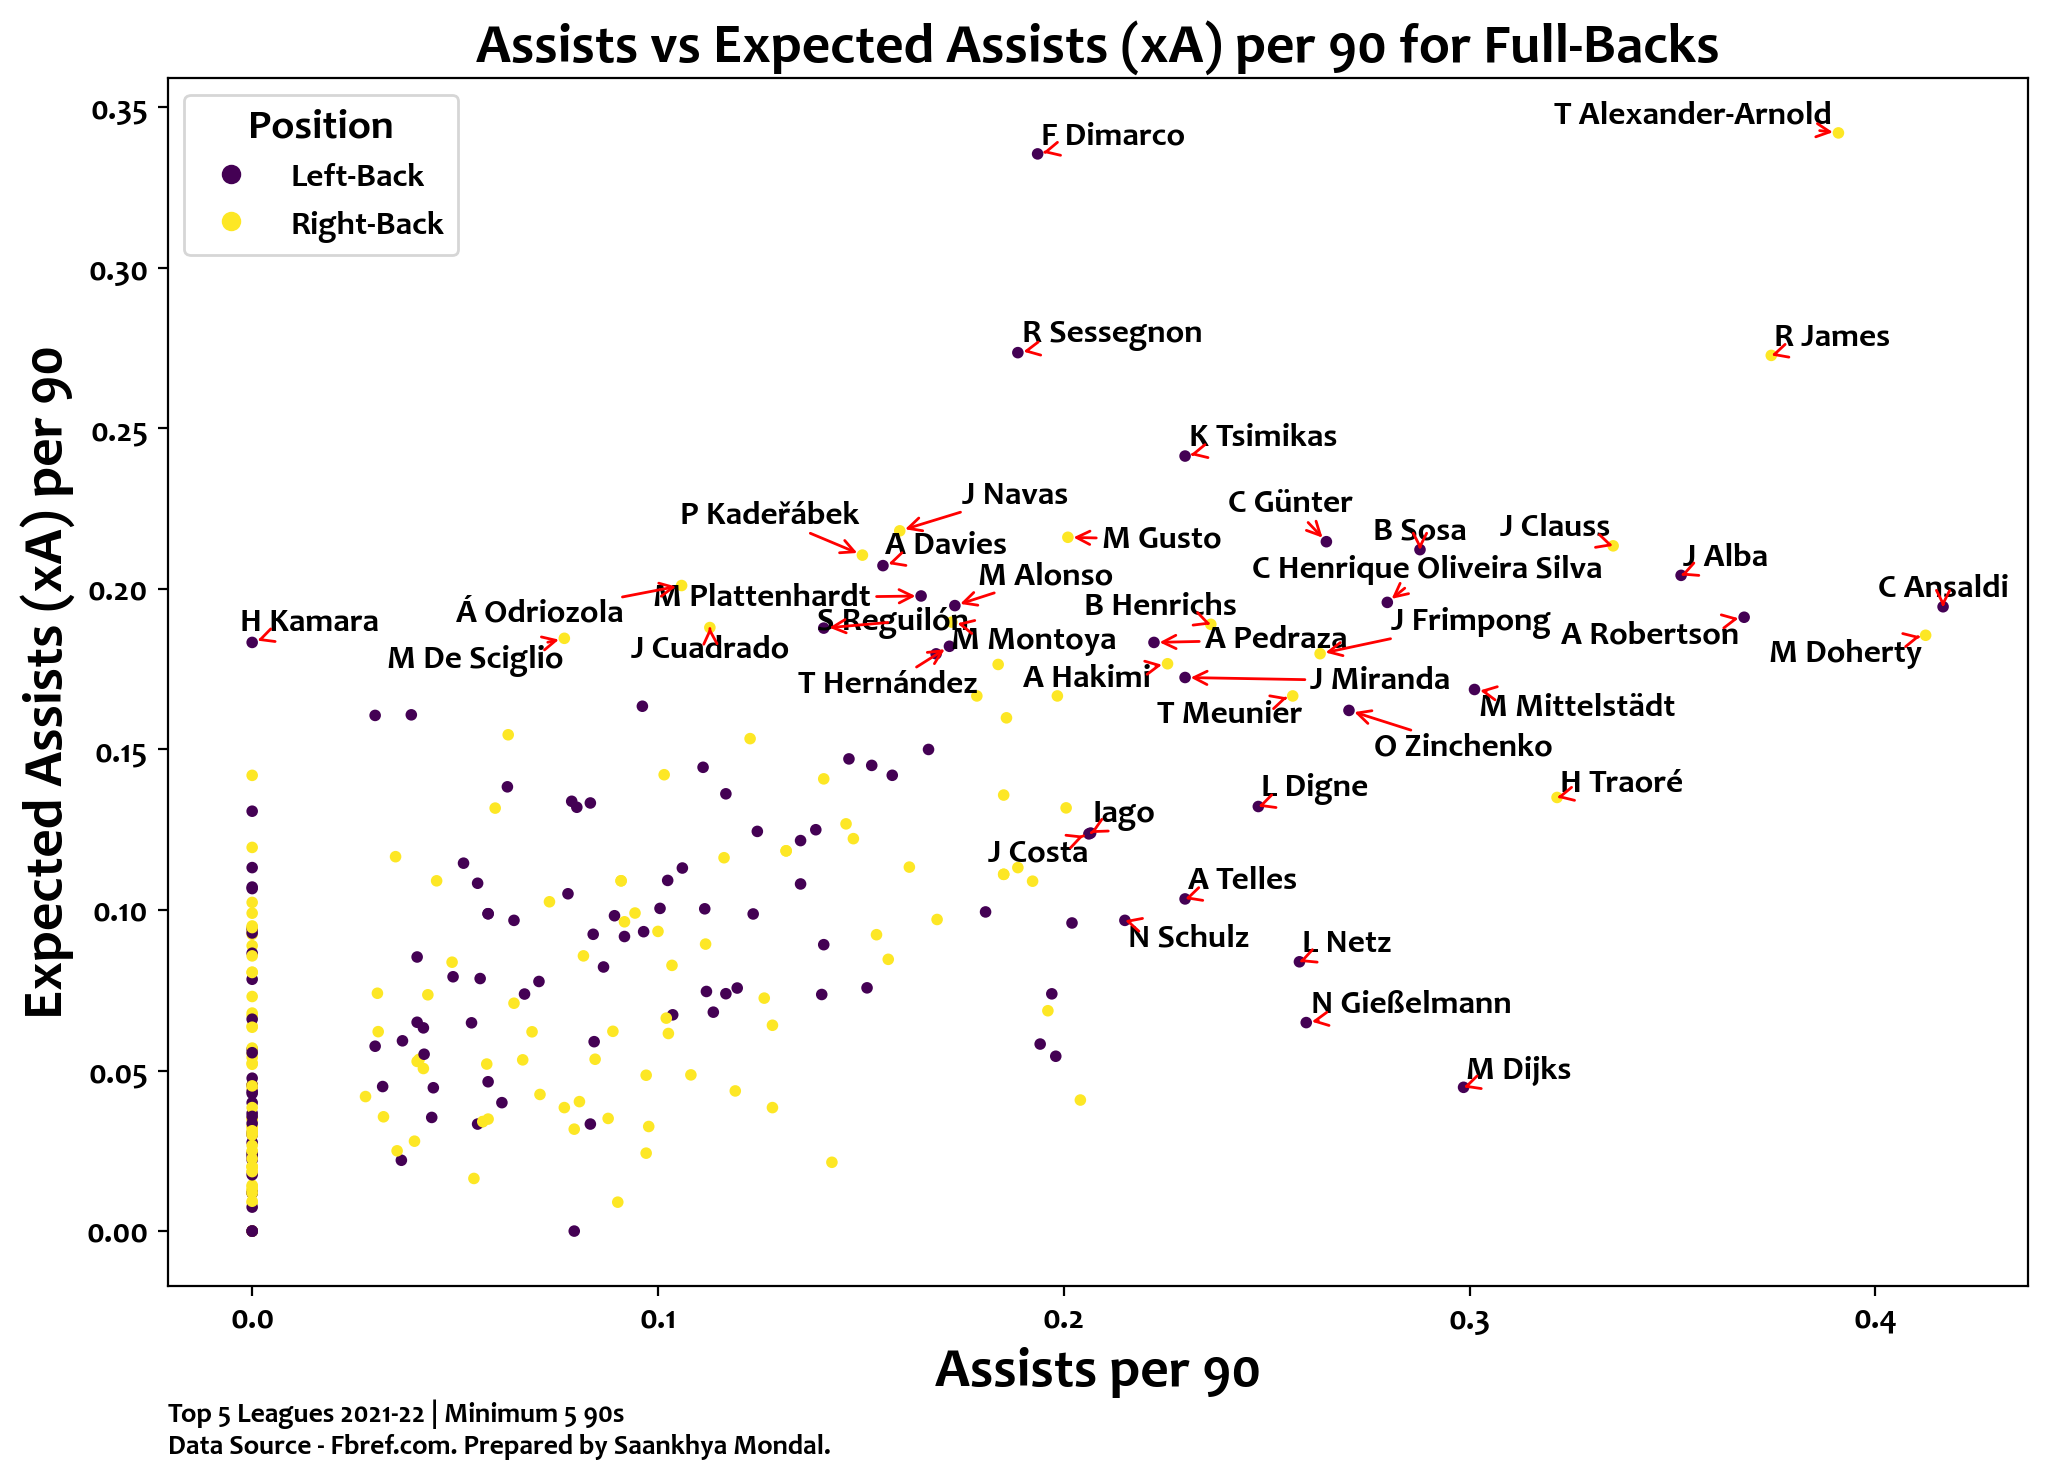

In [13]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x: x in who)]
data['Astp90'] = data['Ast']/data['90s']
data['xAp90'] = data['xA']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['xAp90'].quantile(0.900)
outlier_bottom = data['xAp90'].quantile(0.03)
outlier_right = data['Astp90'].quantile(0.900)
outlier_left = data['Astp90'].quantile(0.03)

par_x = list(data['Astp90'].astype(float))
par_y = list(data['xAp90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Assists per 90', fontsize=20)
ax.set_ylabel('Expected Assists (xA) per 90', fontsize=20)
ax.set_title('Assists vs Expected Assists (xA) per 90 for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [14]:
fig.savefig('Images/AvsxAp90_FB.png', dpi=400, bbox_inches='tight')

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

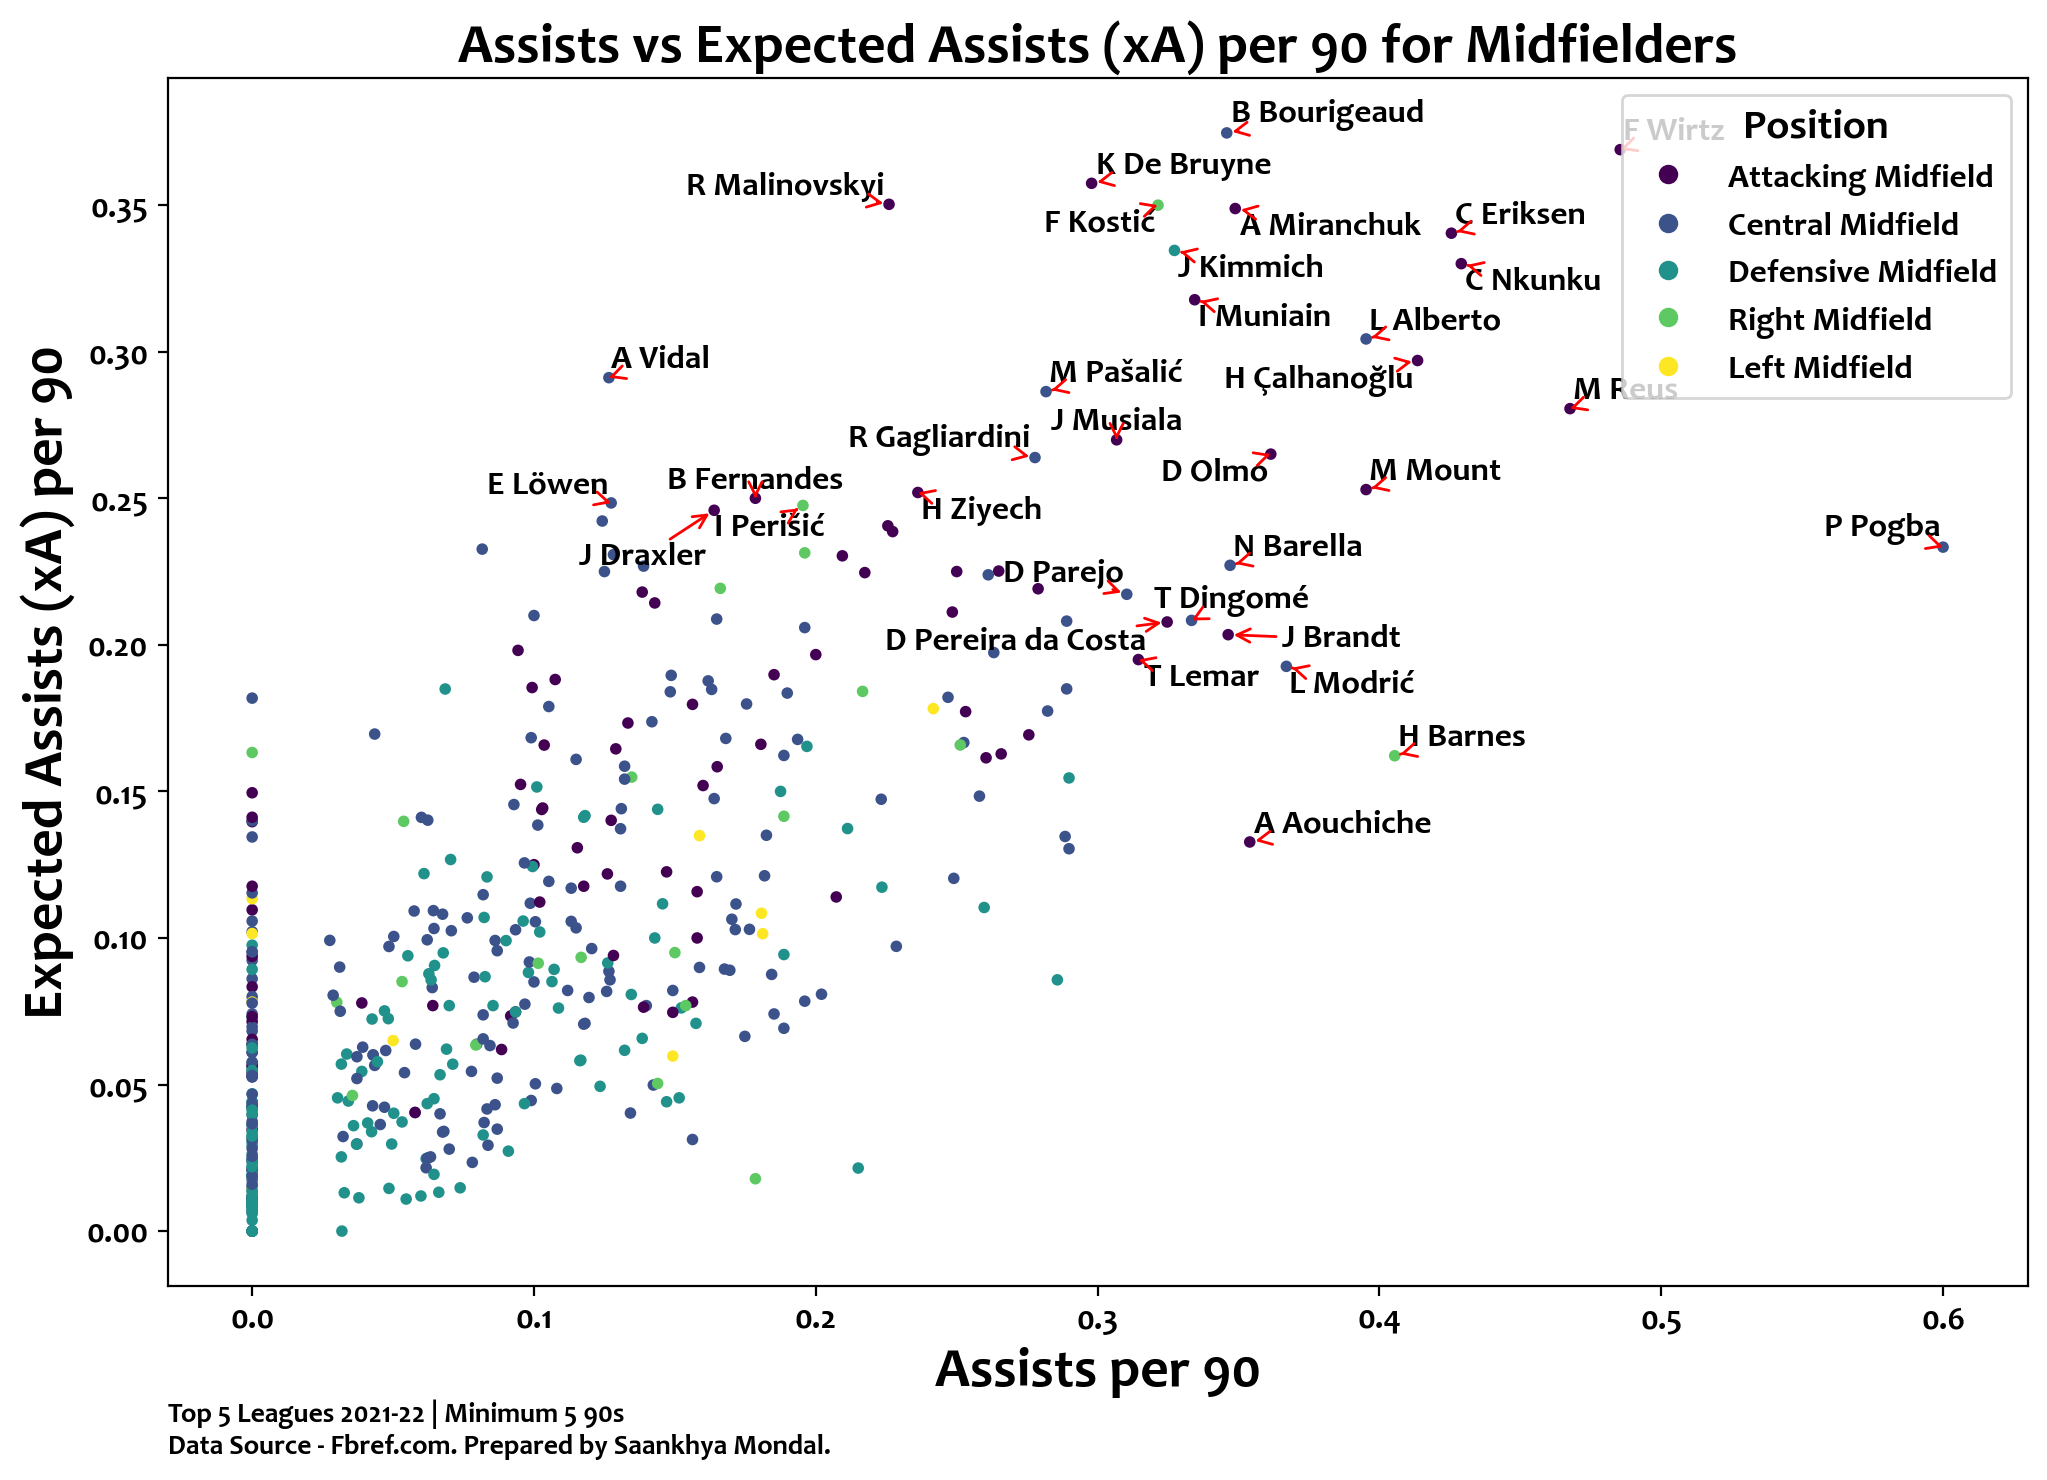

In [15]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Attacking Midfield', 'Central Midfield', 'Defensive Midfield', 'Right Midfield', 'Left Midfield']
data = data[data['Position'].apply(lambda x: x in who)]
data['Astp90'] = data['Ast']/data['90s']
data['xAp90'] = data['xA']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['xAp90'].quantile(0.950)
outlier_bottom = data['xAp90'].quantile(0.03)
outlier_right = data['Astp90'].quantile(0.950)
outlier_left = data['Astp90'].quantile(0.03)

par_x = list(data['Astp90'].astype(float))
par_y = list(data['xAp90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Assists per 90', fontsize=20)
ax.set_ylabel('Expected Assists (xA) per 90', fontsize=20)
ax.set_title('Assists vs Expected Assists (xA) per 90 for Midfielders', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

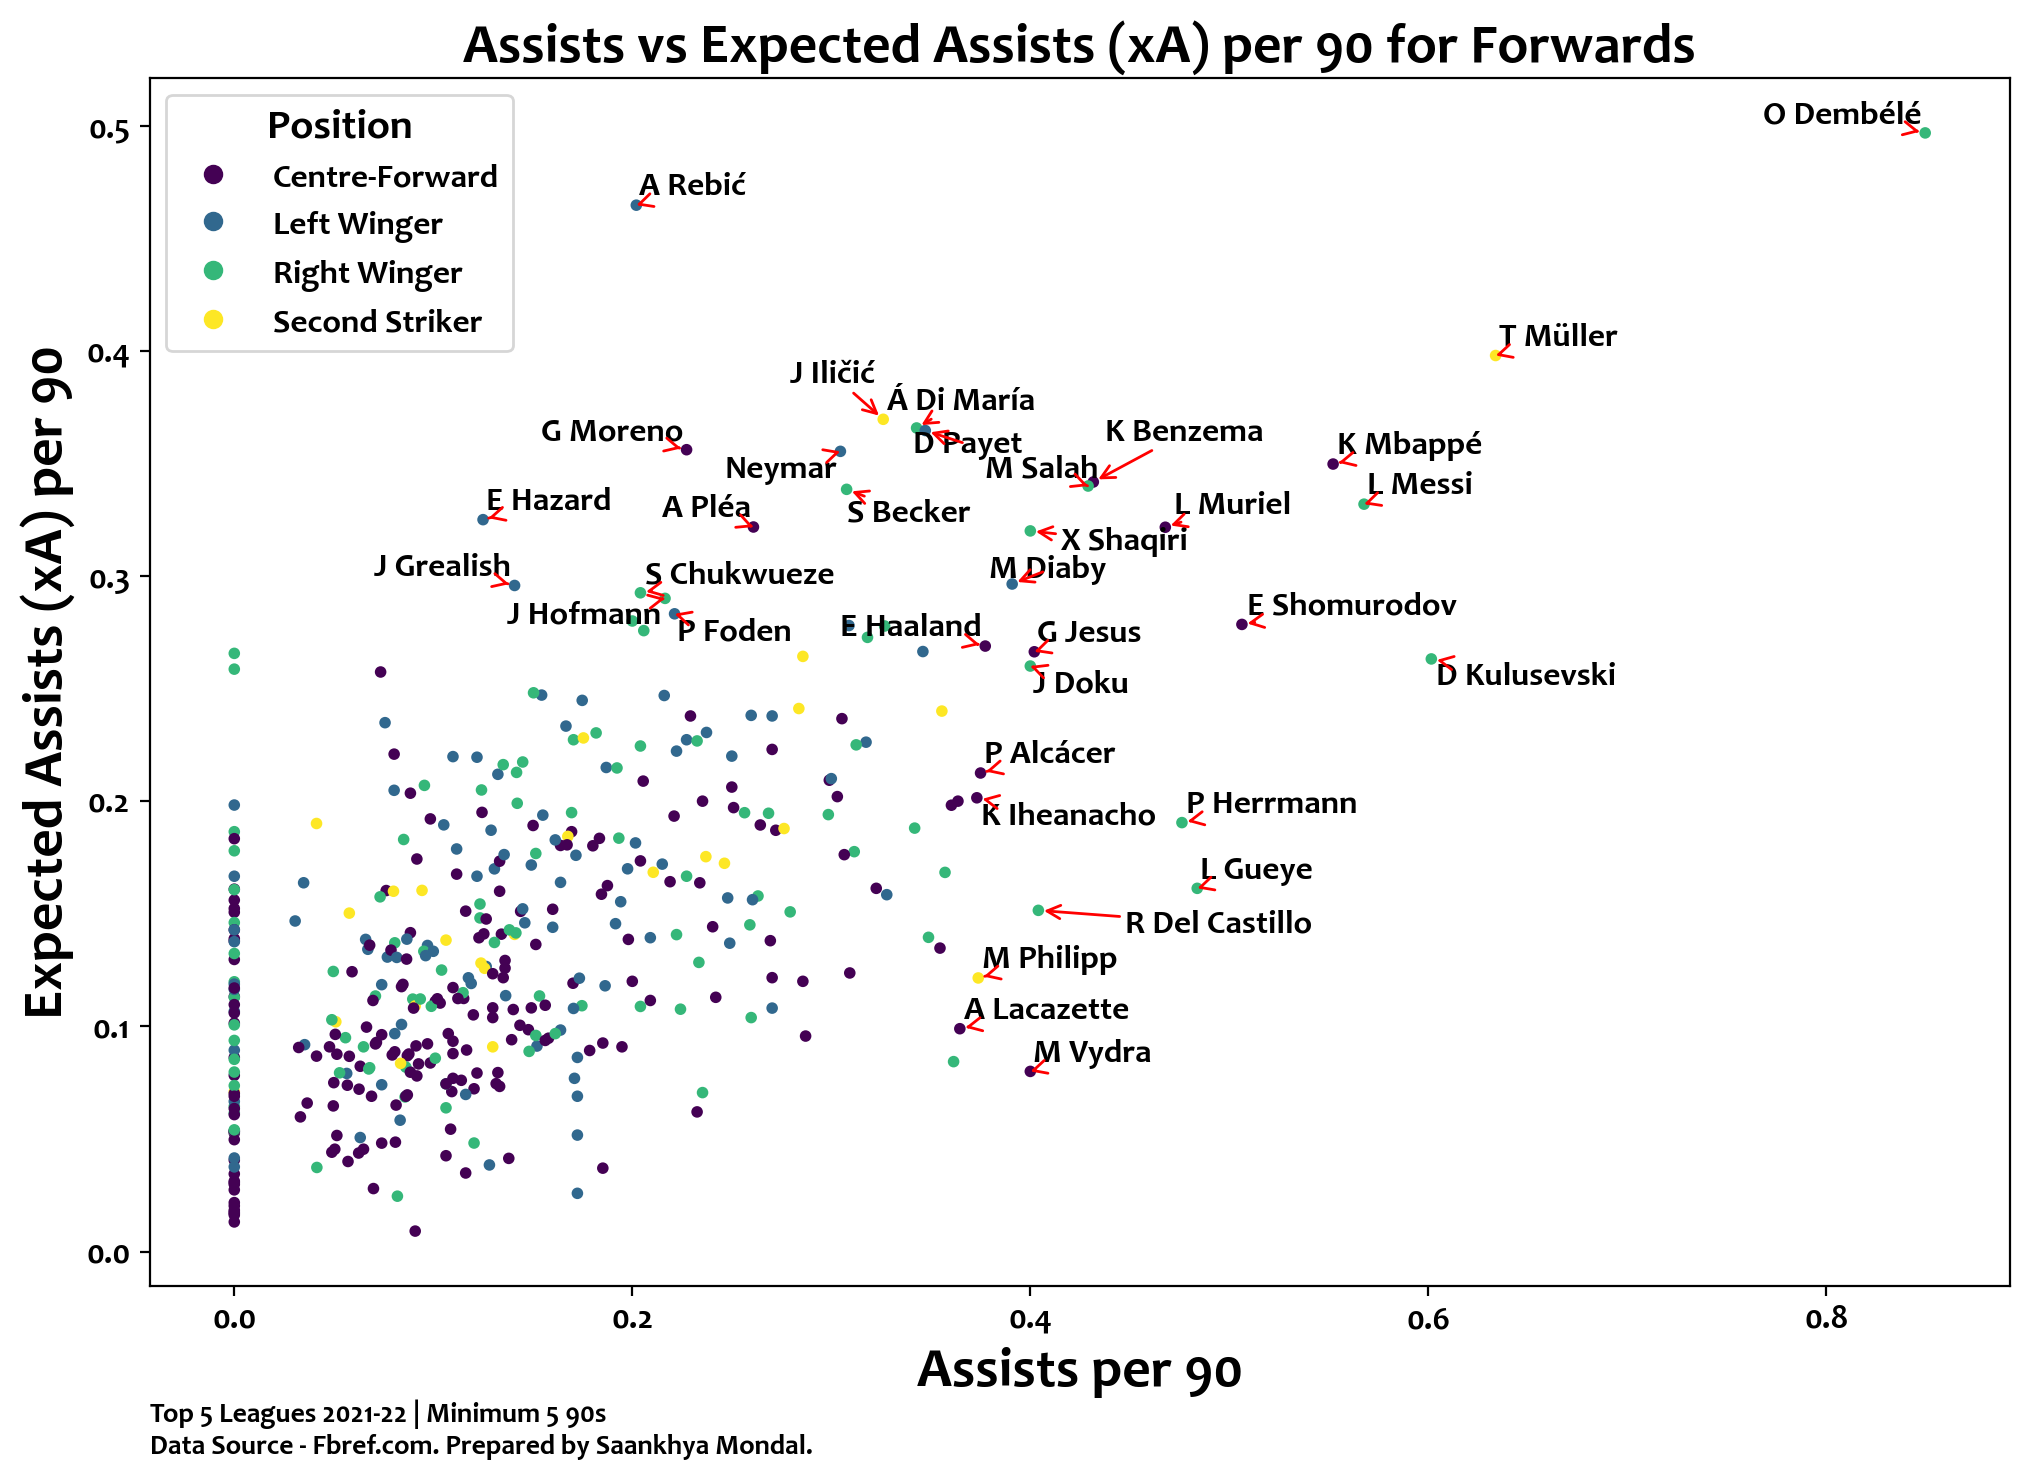

In [16]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Centre-Forward', 'Left Winger', 'Right Winger', 'Second Striker']
data = data[data['Position'].apply(lambda x: x in who)]
data['Astp90'] = data['Ast']/data['90s']
data['xAp90'] = data['xA']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['xAp90'].quantile(0.950)
outlier_bottom = data['xAp90'].quantile(0.03)
outlier_right = data['Astp90'].quantile(0.950)
outlier_left = data['Astp90'].quantile(0.03)

par_x = list(data['Astp90'].astype(float))
par_y = list(data['xAp90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Assists per 90', fontsize=20)
ax.set_ylabel('Expected Assists (xA) per 90', fontsize=20)
ax.set_title('Assists vs Expected Assists (xA) per 90 for Forwards', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

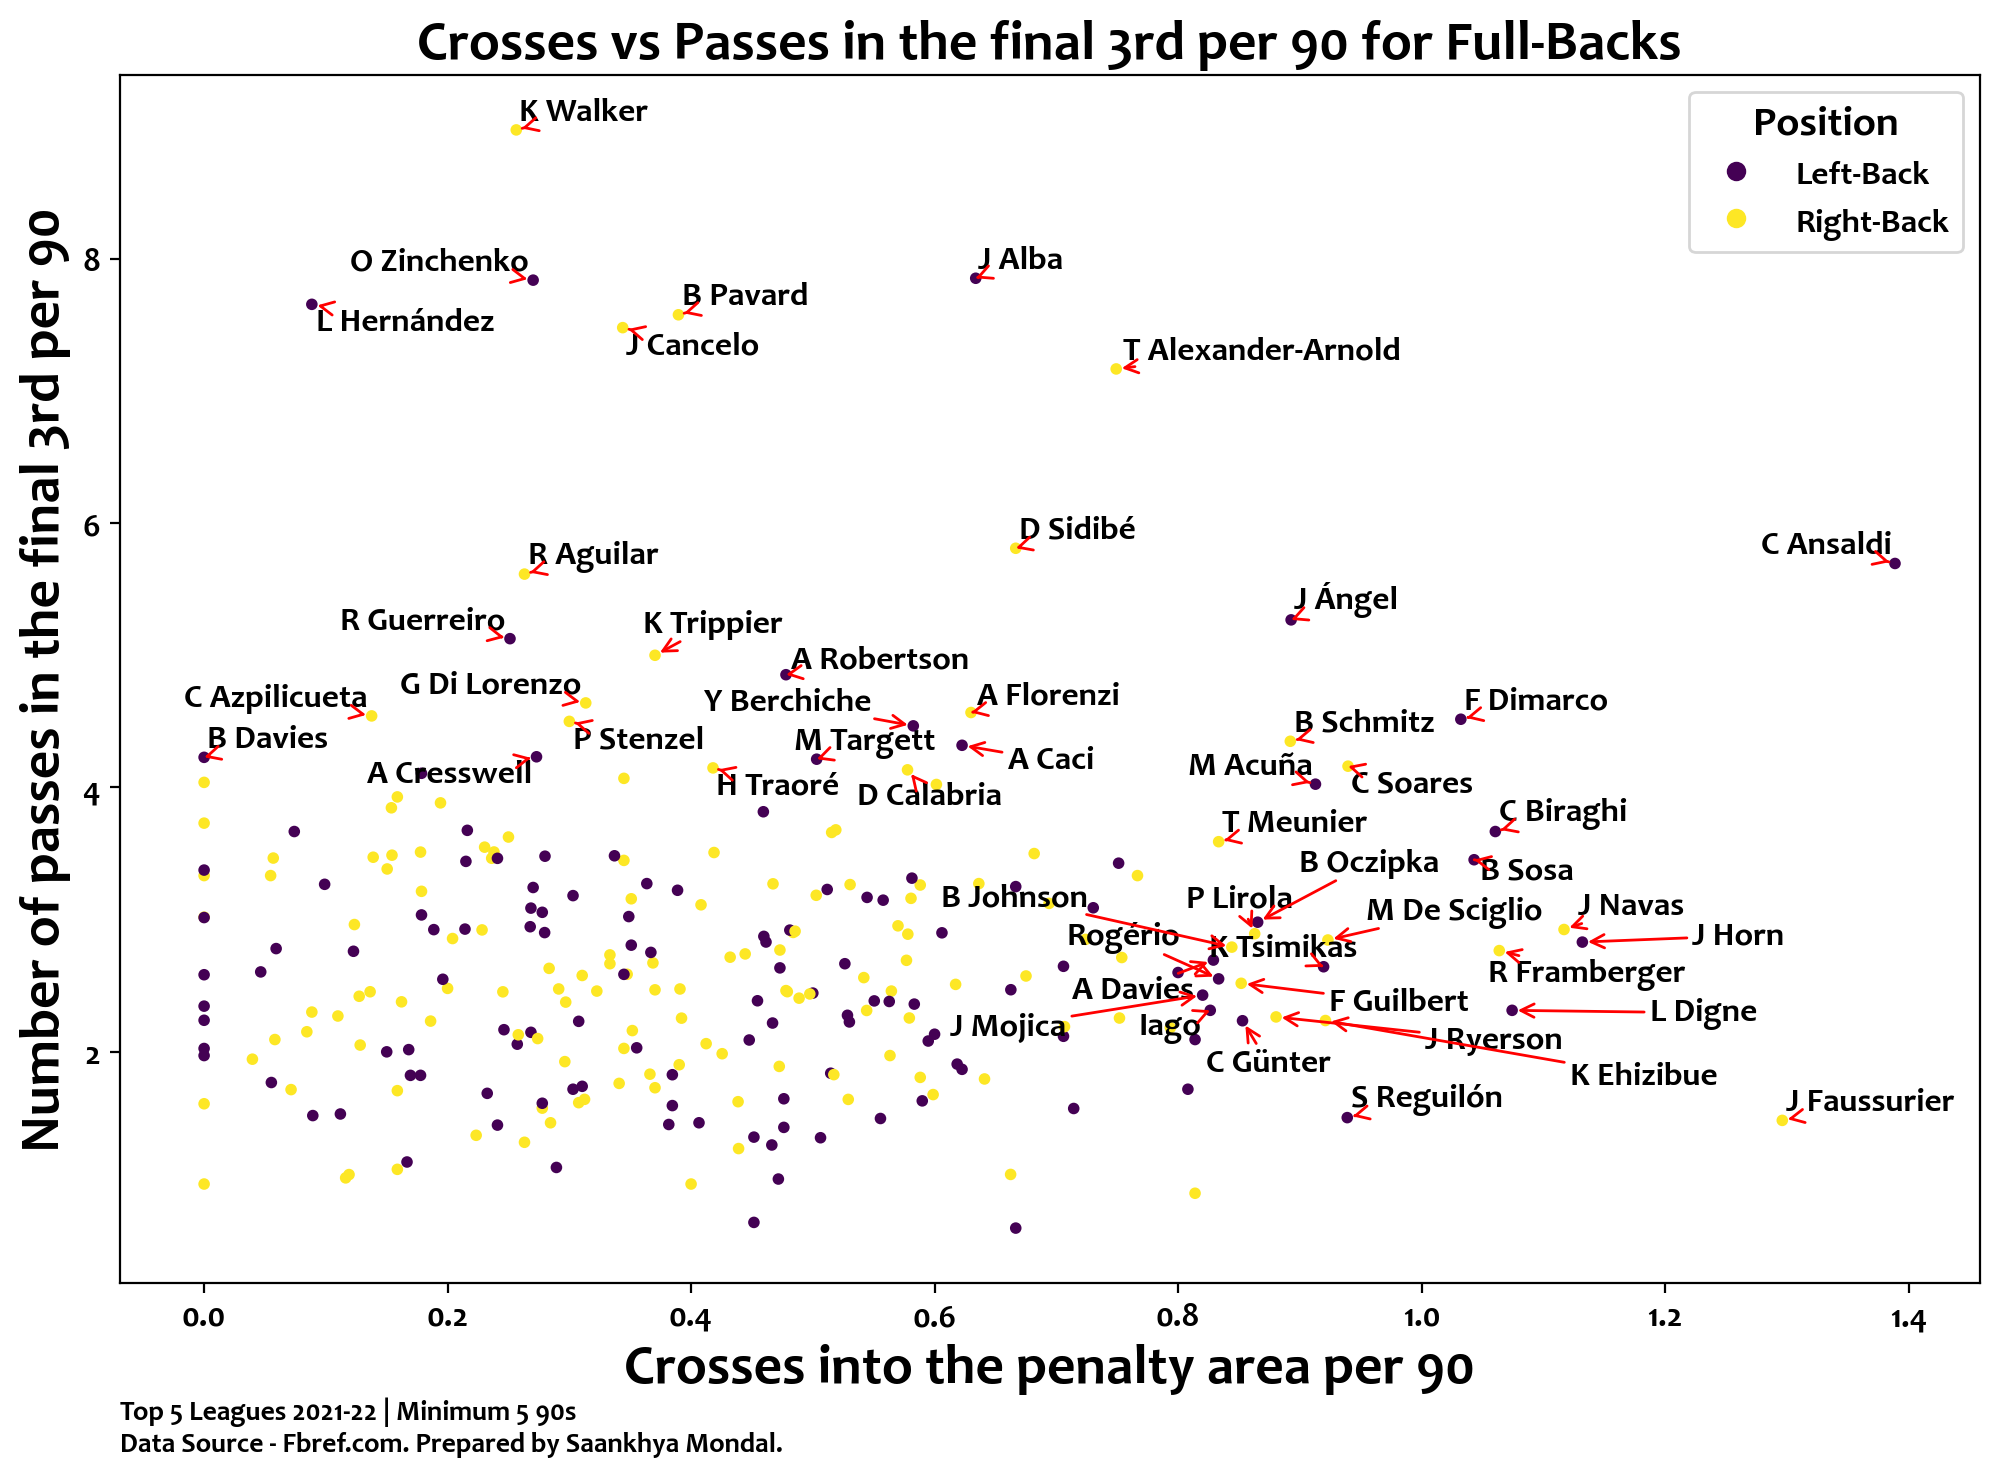

In [17]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x: x in who)]
data['1/3p90'] = data['1/3']/data['90s']
data['CrsPAp90'] = data['CrsPA']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['1/3p90'].quantile(0.900)
outlier_bottom = data['1/3p90'].quantile(0.03)
outlier_right = data['CrsPAp90'].quantile(0.900)
outlier_left = data['CrsPAp90'].quantile(0.03)

par_x = list(data['CrsPAp90'].astype(float))
par_y = list(data['1/3p90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Crosses into the penalty area per 90', fontsize=20)
ax.set_ylabel('Number of passes in the final 3rd per 90', fontsize=20)
ax.set_title('Crosses vs Passes in the final 3rd per 90 for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [18]:
fig.savefig('Images/Crp90vs13p90_FB.png', dpi=400, bbox_inches='tight')

In [19]:
player_data

S. No.            Player            Position   90s     Cmp  PrgDist  \
0          4  Yunis Abdelhamid         Centre-Back  32.1  1239.0   9065.0   
1          7   Laurent Abergel  Defensive Midfield  31.9  1282.0   6459.0   
2          8       Charles Abi      Centre-Forward   0.5     2.0      0.0   
3          9    Matthis Abline      Centre-Forward   1.1     8.0     22.0   
4         12     Tammy Abraham      Centre-Forward  33.3   488.0   1726.0   
...      ...               ...                 ...   ...     ...      ...   
2007    2817        Kurt Zouma         Centre-Back  22.1   798.0   4597.0   
2008    2818     Igor Zubeldia  Defensive Midfield  18.3   920.0   5705.0   
2009    2820  Martín Zubimendi  Defensive Midfield  27.8  1174.0   5724.0   
2010    2822   Martin Ødegaard  Attacking Midfield  28.9  1253.0   4971.0   
2011    2823     Filip Đuričić  Attacking Midfield   7.5   184.0    770.0   

      Ast   xA  A-xA    KP    1/3   PPA  CrsPA   Prog  
0     0.0  0.3  -0.3   7.0   77.0   6.0    0.0   87.0  
1     2.0  2.8  -0.8  28.0  121.0  17.0    6.0  126.0  
2     0.0  0.0   0.0   0.0    0.0   0.0    0.0    0.0  
3     0.0  0.0   0.0   1.0    1.0   1.0    0.0    1.0  
4     4.0  3.5   0.5  34.0   37.0  28.0    4.0   60.0  
...   ...  ...   ...   ...    ...   ...    ...    ...  
2007  0.0  0.0   0.0   0.0   22.0   1.0    0.0   31.0  
2008  1.0  0.2   0.8   1.0   49.0   4.0    2.0   42.0  
2009  1.0  1.0   0.0  15.0  113.0  10.0    1.0   97.0  
2010  4.0  6.3  -2.3  68.0   91.0  61.0    3.0  140.0  
2011  1.0  1.3  -0.3  11.0   13.0  18.0    0.0   34.0  

[2012 rows x 14 columns]

c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

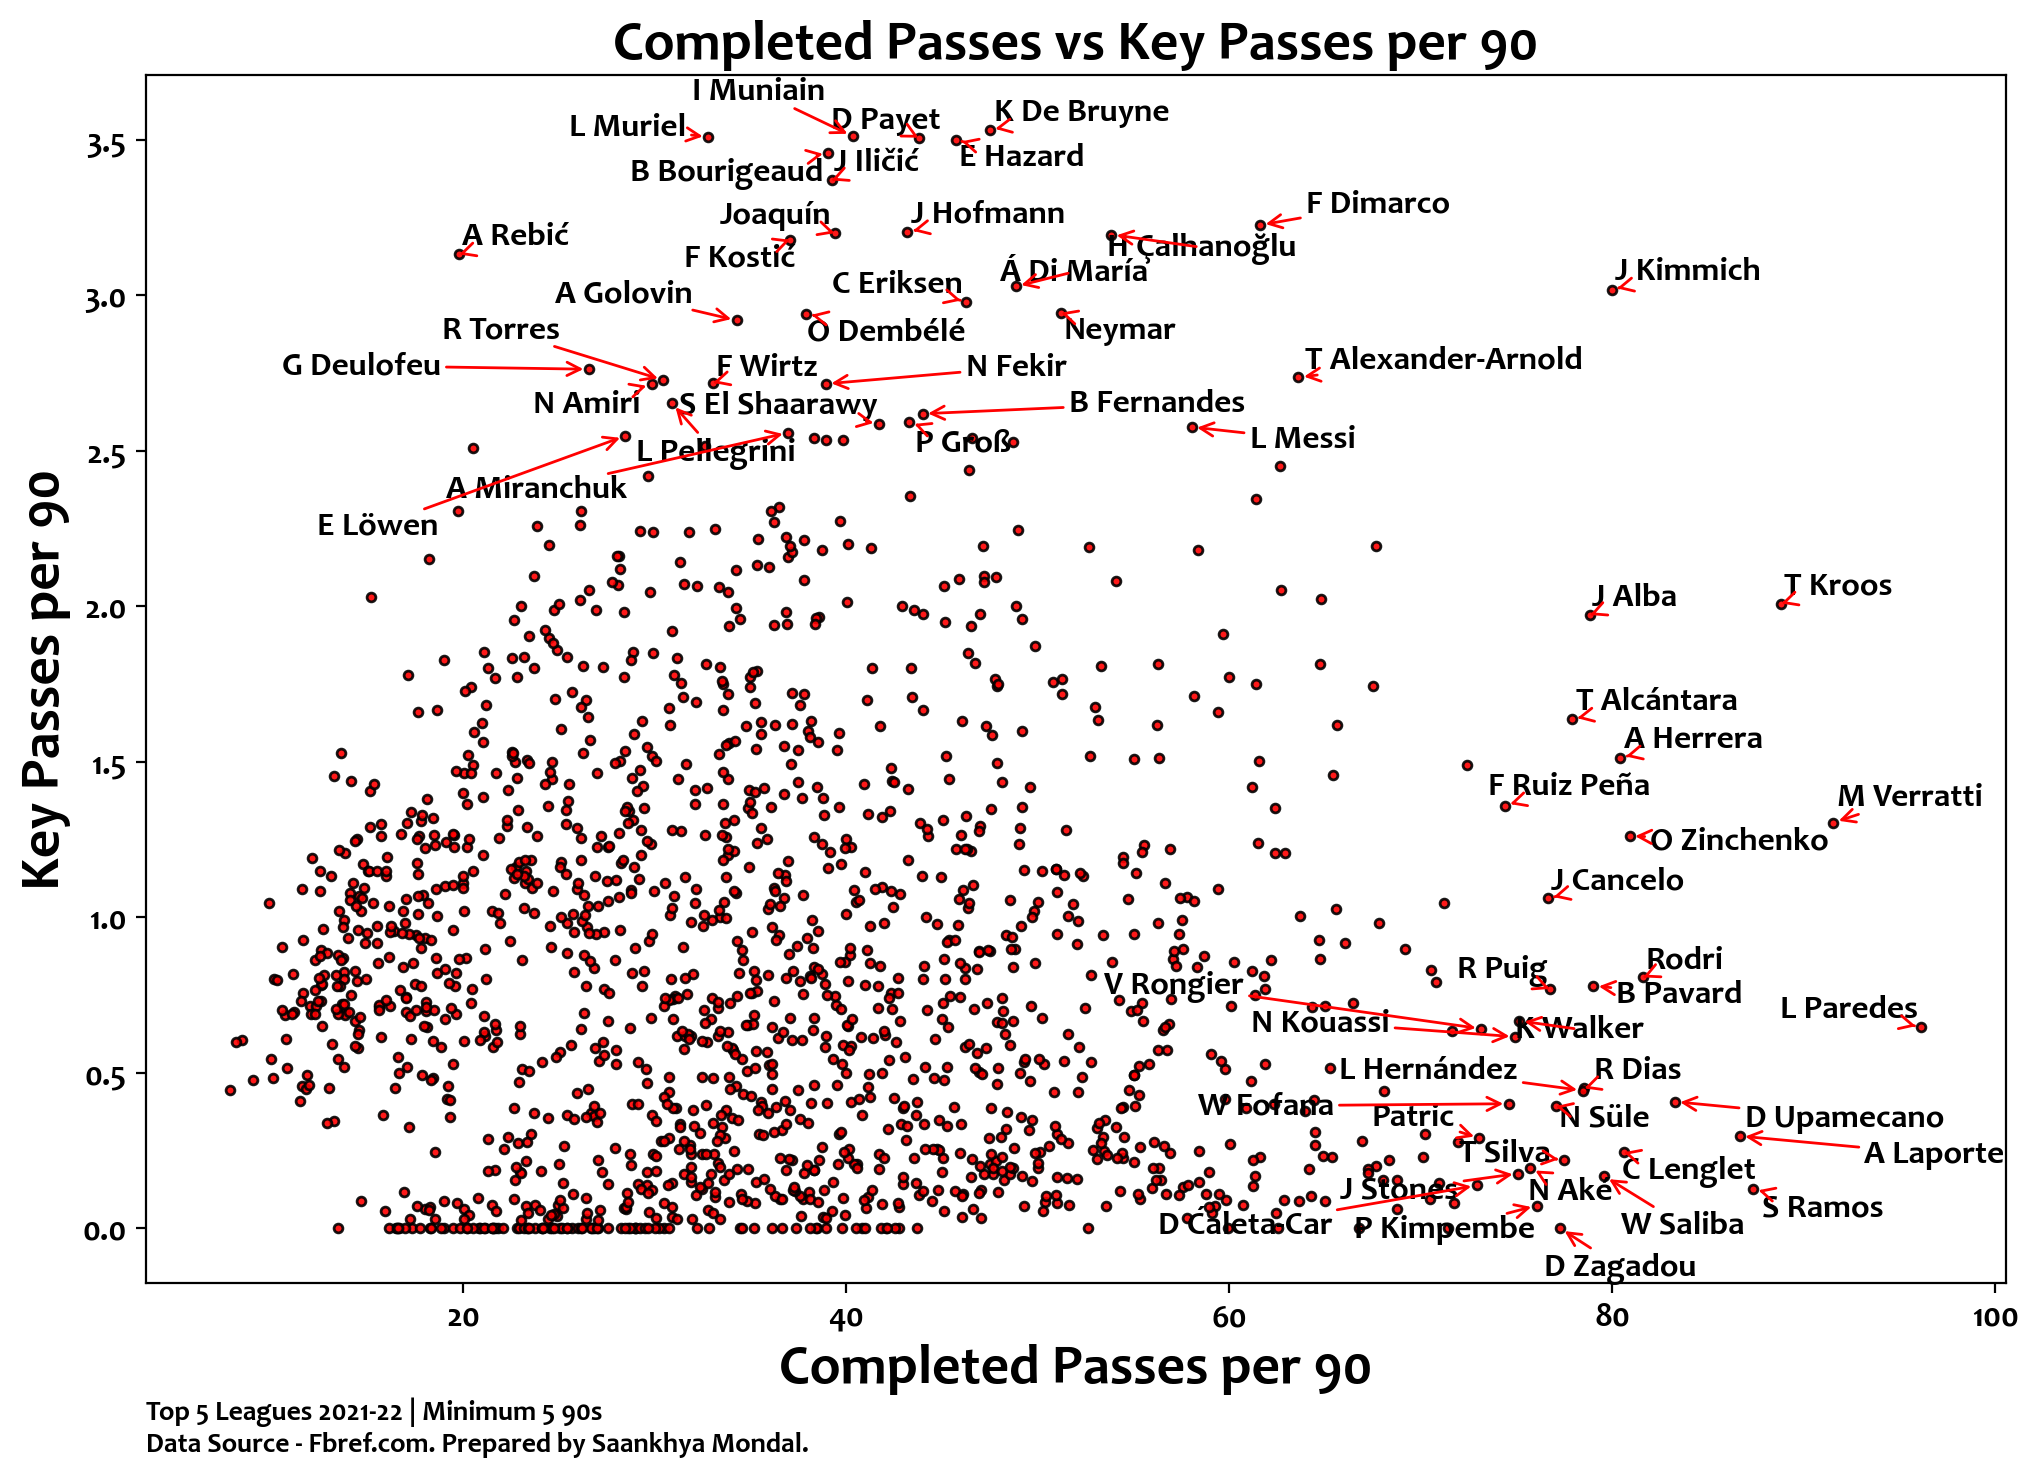

In [20]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
data['Cmpp90'] = data['Cmp']/data['90s']
data['KPp90'] = data['KP']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['KPp90'].quantile(0.980)
outlier_bottom = data['KPp90'].quantile(0.03)
outlier_right = data['Cmpp90'].quantile(0.980)
outlier_left = data['Cmpp90'].quantile(0.03)

par_x = list(data['Cmpp90'].astype(float))
par_y = list(data['KPp90'].astype(float))
plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Completed Passes per 90', fontsize=20)
ax.set_ylabel('Key Passes per 90', fontsize=20)
ax.set_title('Completed Passes vs Key Passes per 90', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

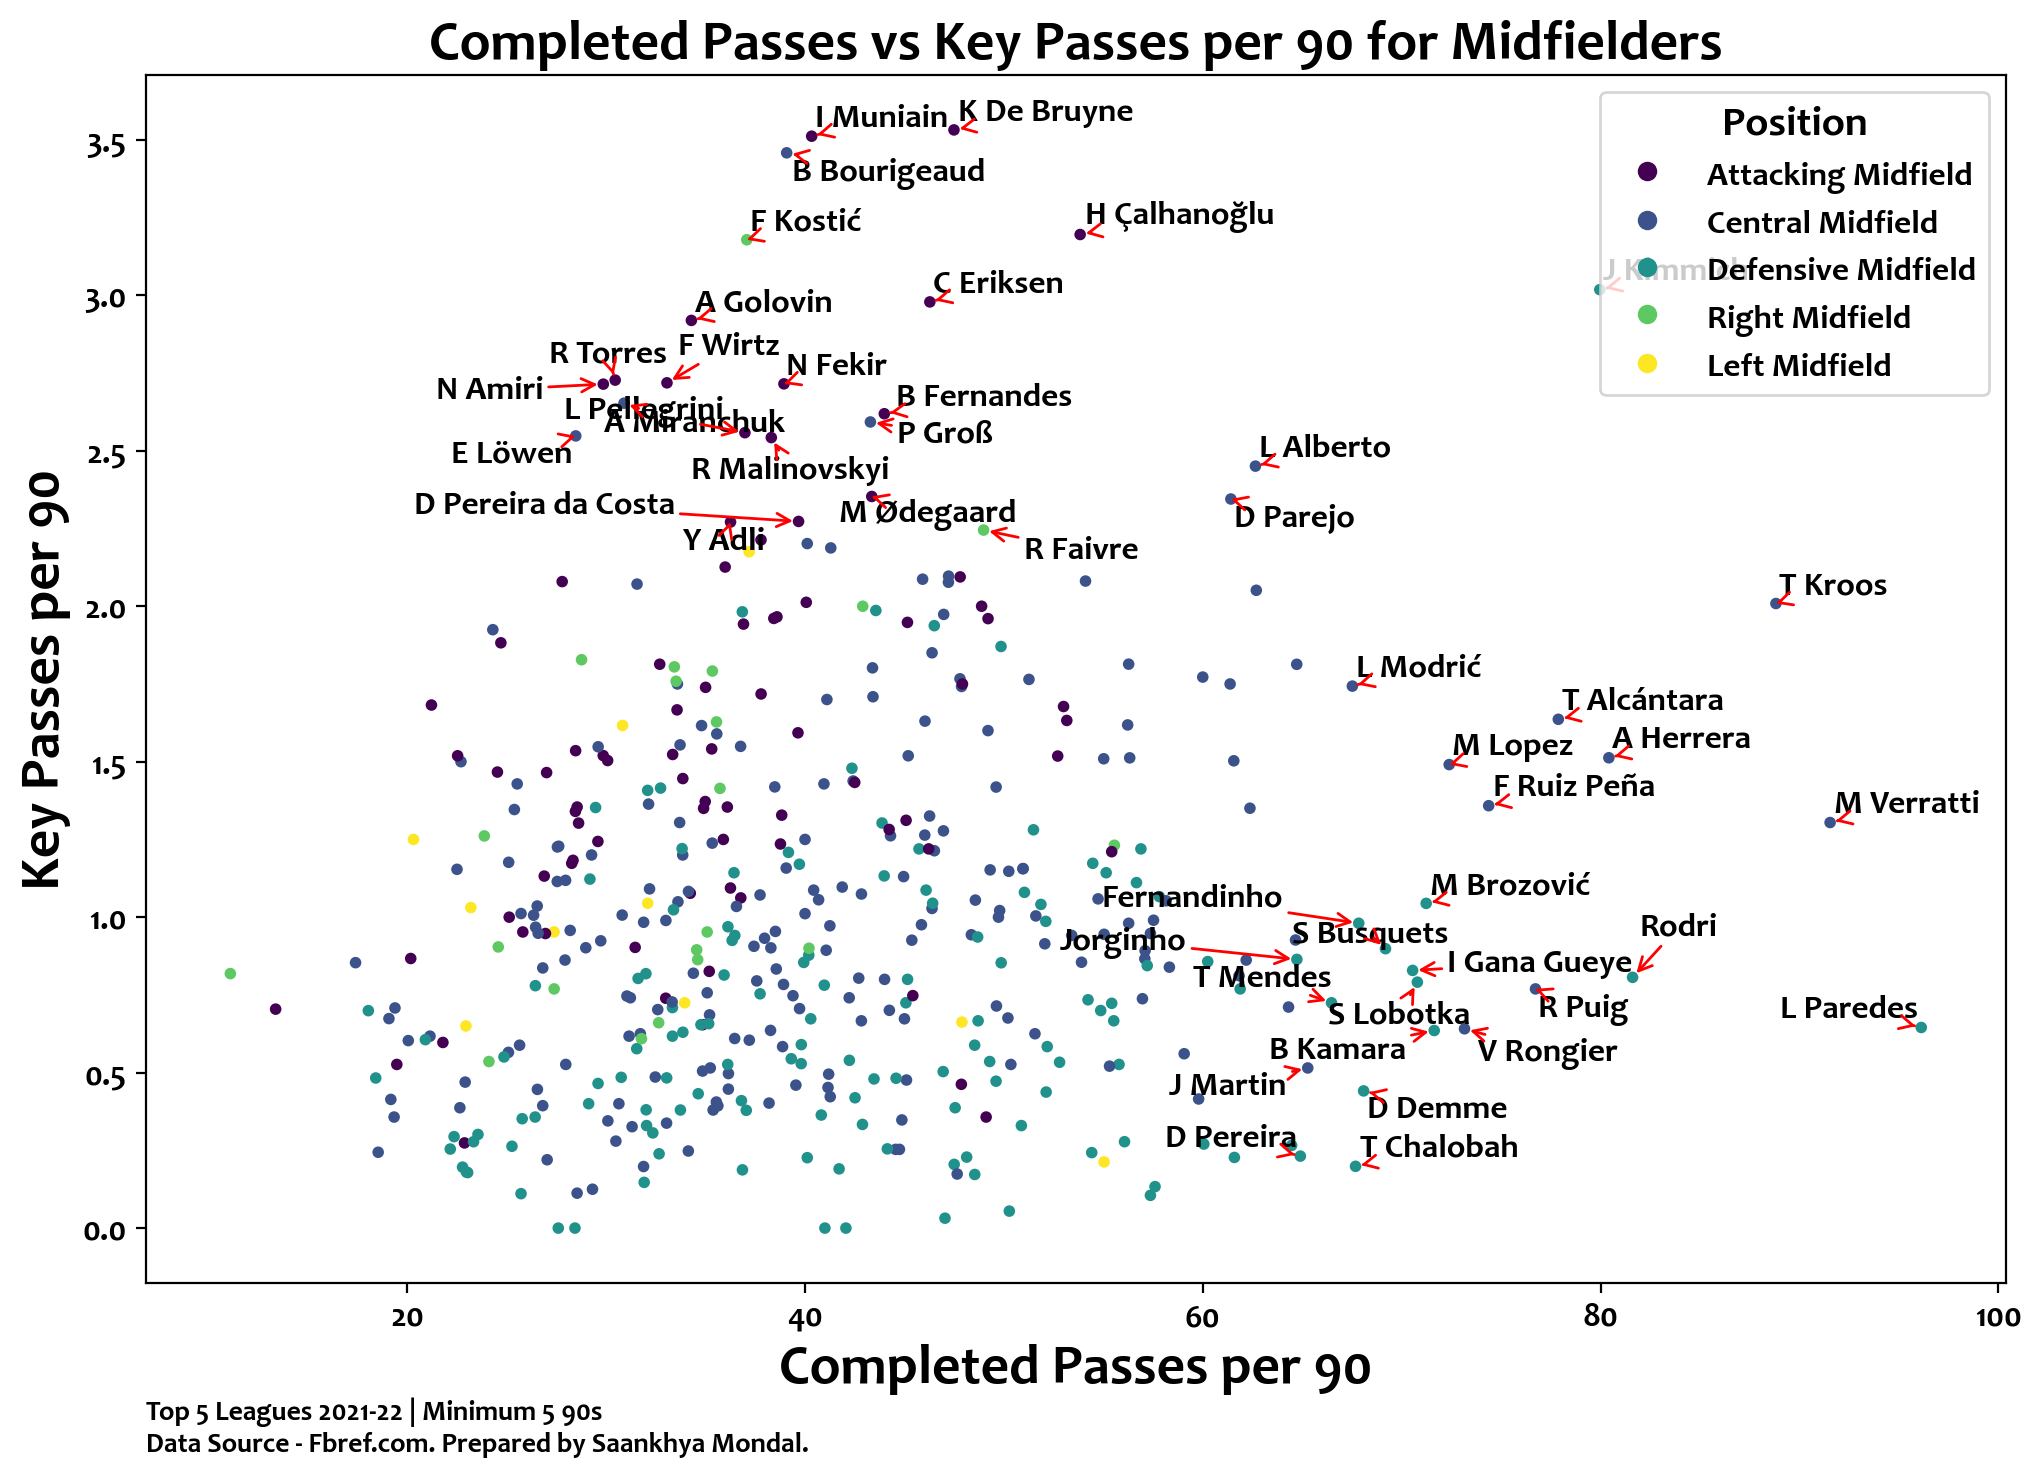

In [21]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Attacking Midfield', 'Central Midfield', 'Defensive Midfield', 'Right Midfield', 'Left Midfield']
data = data[data['Position'].apply(lambda x: x in who)]
data['Cmpp90'] = data['Cmp']/data['90s']
data['KPp90'] = data['KP']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['KPp90'].quantile(0.950)
outlier_bottom = data['KPp90'].quantile(0.03)
outlier_right = data['Cmpp90'].quantile(0.950)
outlier_left = data['Cmpp90'].quantile(0.03)

par_x = list(data['Cmpp90'].astype(float))
par_y = list(data['KPp90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Completed Passes per 90', fontsize=20)
ax.set_ylabel('Key Passes per 90', fontsize=20)
ax.set_title('Completed Passes vs Key Passes per 90 for Midfielders', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

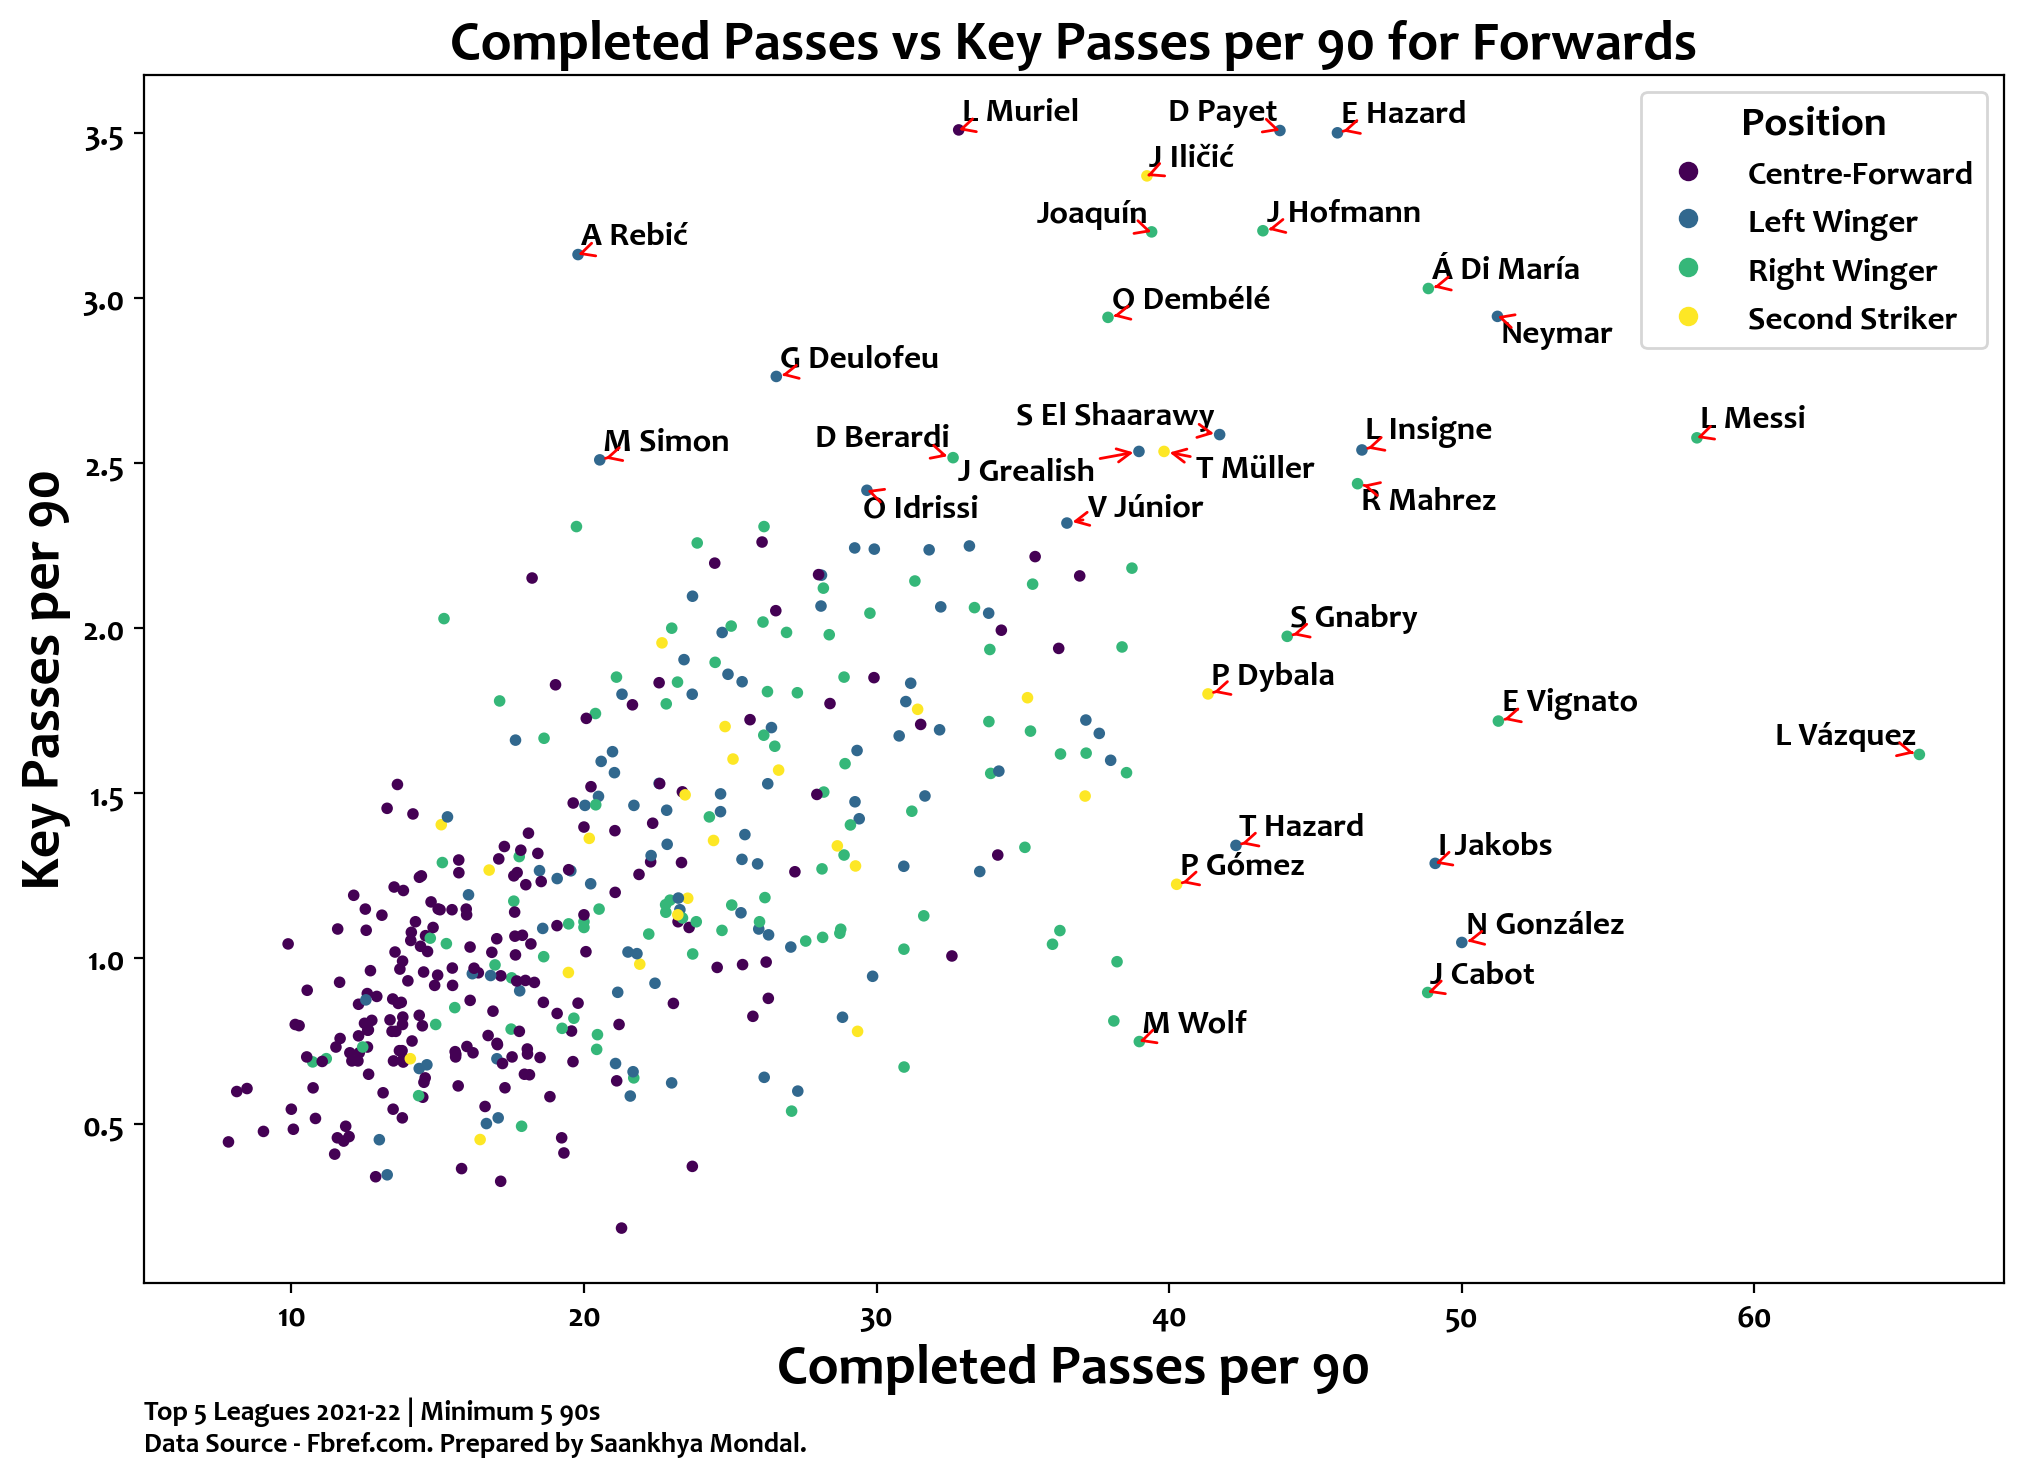

In [22]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Centre-Forward', 'Left Winger', 'Right Winger', 'Second Striker']
data = data[data['Position'].apply(lambda x: x in who)]
data['Cmpp90'] = data['Cmp']/data['90s']
data['KPp90'] = data['KP']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['KPp90'].quantile(0.950)
outlier_bottom = data['KPp90'].quantile(0.03)
outlier_right = data['Cmpp90'].quantile(0.950)
outlier_left = data['Cmpp90'].quantile(0.03)

par_x = list(data['Cmpp90'].astype(float))
par_y = list(data['KPp90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Completed Passes per 90', fontsize=20)
ax.set_ylabel('Key Passes per 90', fontsize=20)
ax.set_title('Completed Passes vs Key Passes per 90 for Forwards', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

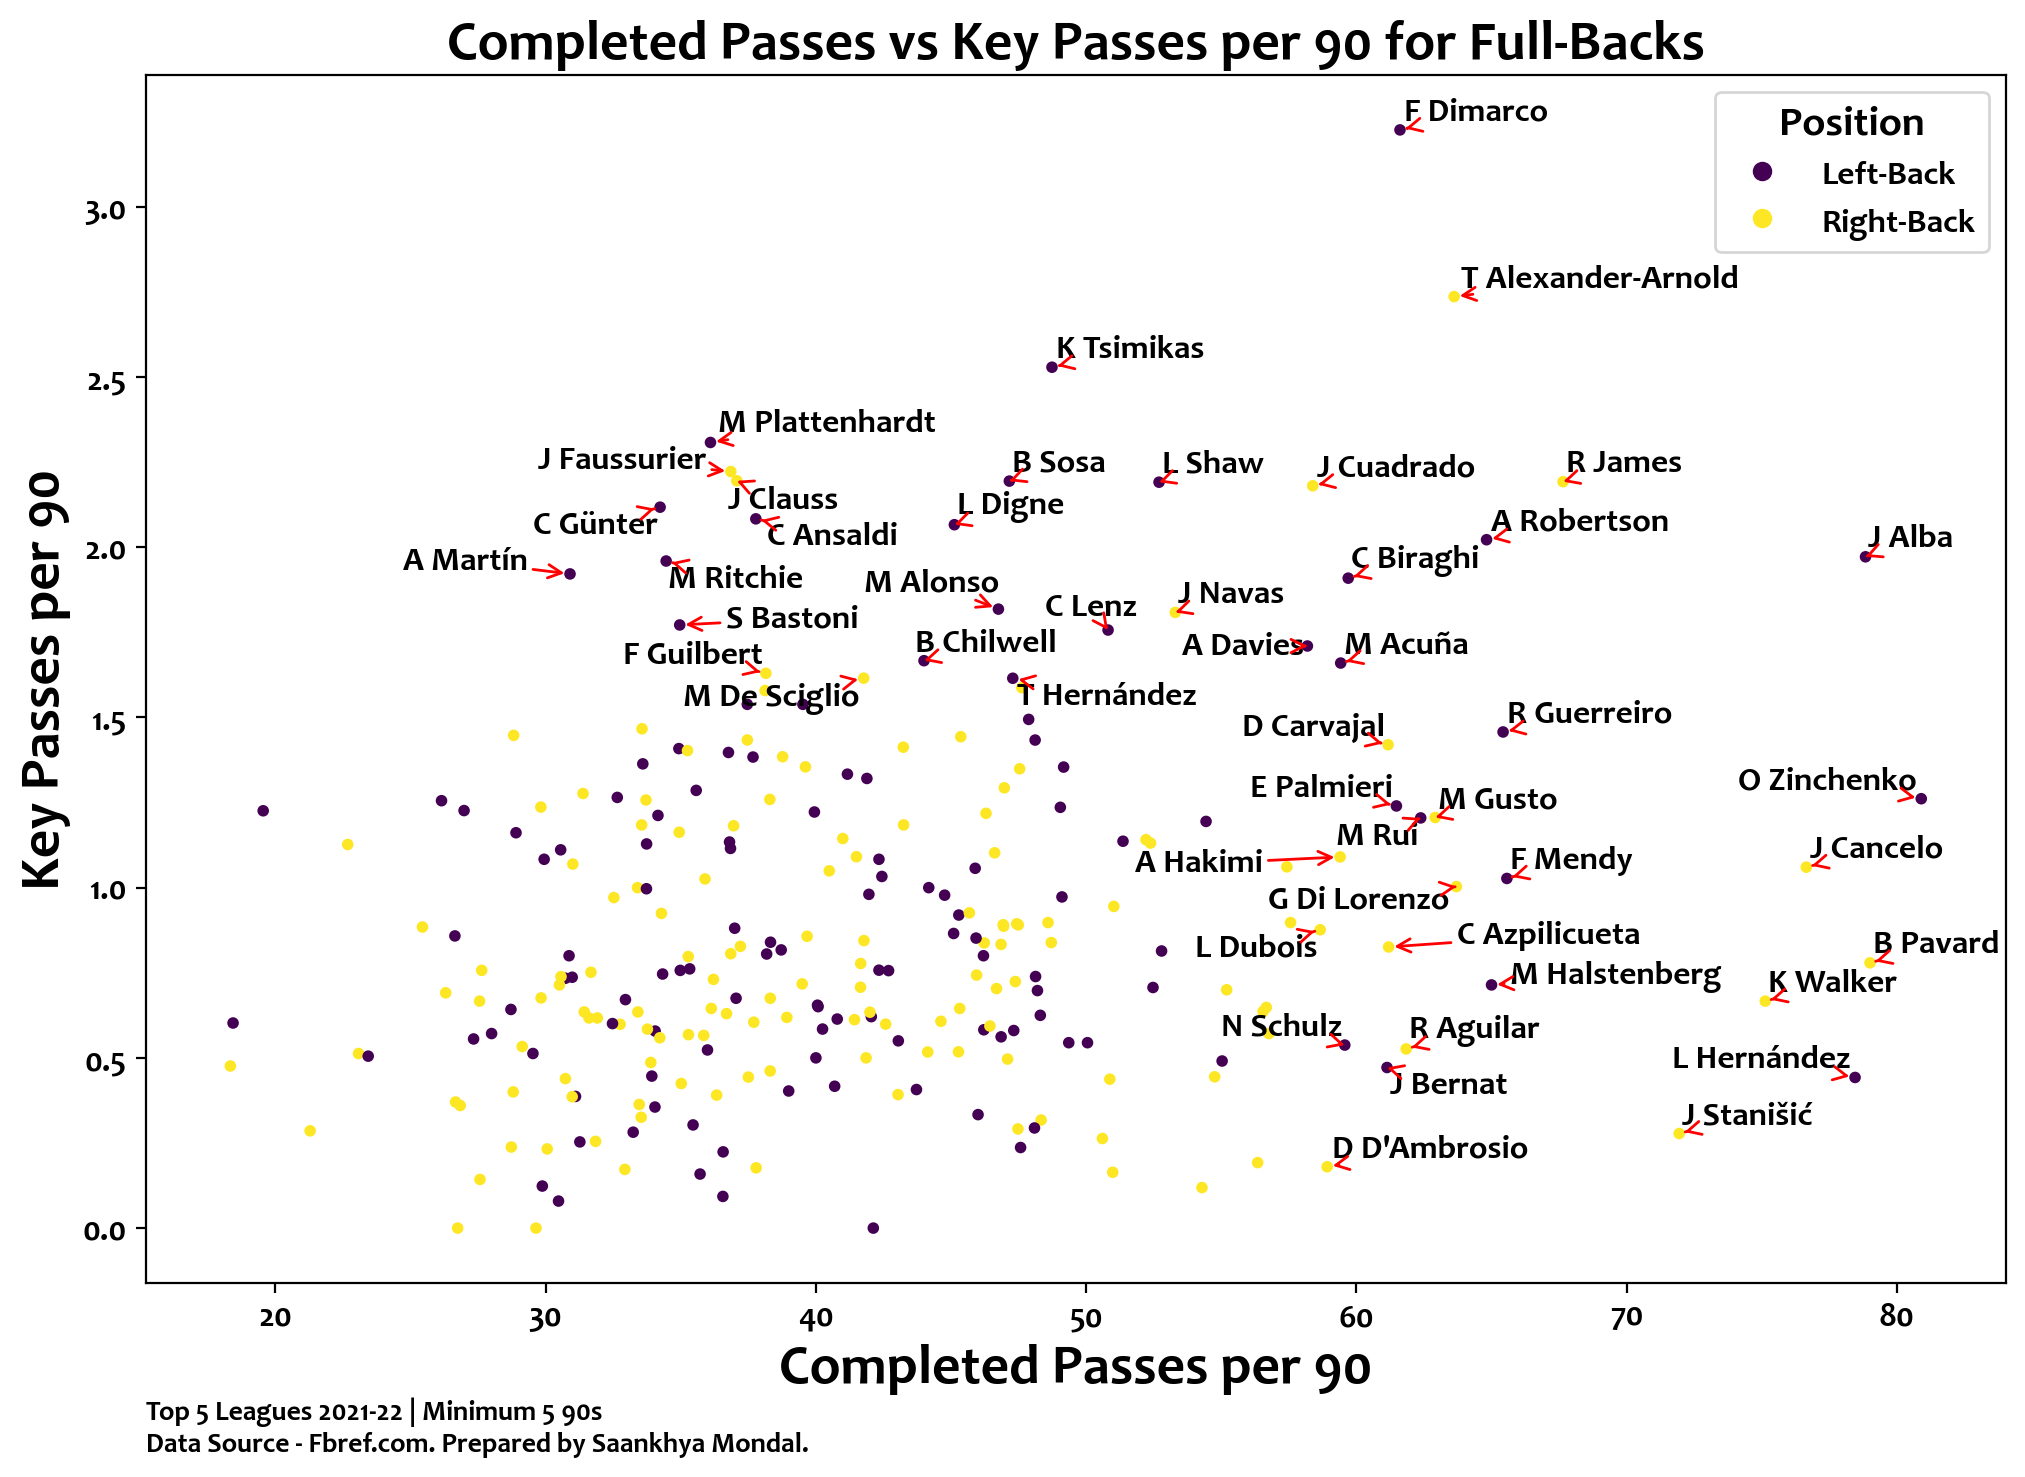

In [23]:
data = player_data[player_data['90s'].astype(float) >= 5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x: x in who)]
data['Cmpp90'] = data['Cmp']/data['90s']
data['KPp90'] = data['KP']/data['90s']

fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)

outlier_top = data['KPp90'].quantile(0.900)
outlier_bottom = data['KPp90'].quantile(0.03)
outlier_right = data['Cmpp90'].quantile(0.900)
outlier_left = data['Cmpp90'].quantile(0.03)

par_x = list(data['Cmpp90'].astype(float))
par_y = list(data['KPp90'].astype(float))
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, s=10, c=col_codes)
txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('Completed Passes per 90', fontsize=20)
ax.set_ylabel('Key Passes per 90', fontsize=20)
ax.set_title('Completed Passes vs Key Passes per 90 for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [24]:
fig.savefig('Images/Cmpp90vsKPp90_FB.png', dpi=400, bbox_inches='tight')